In [35]:
import os
from astropy.table import Table
from astropy.stats import mad_std
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [37]:
out_dir = 'results_4thb/'

stamps_path = os.path.join(out_dir, 'postage_stamps.fits')
cat_real_path = os.path.join(out_dir, 'catalog_real.fits')
cat_mock_path = os.path.join(out_dir, 'catalog_mock.fits')
cat_param_path = os.path.join(out_dir, 'catalog_param.fits')


cat = Table.read(stamps_path)    
print("Done loading postage stamps")

m_real = Table.read(cat_real_path)
m_mock = Table.read(cat_mock_path)
m_param = Table.read(cat_param_path)
print("Done loading morphology statistics")

# Remove offensive objects
mask = m_real['flag'] & m_mock['flag'] & m_param['flag']
mask &= m_real['flag_morph'] & m_mock['flag_morph'] & m_param['flag_morph'] 
mask &= ~isnan(m_real['M20']) & ~isnan(m_mock['M20']) & ~isnan(m_param['M20'])
m = mask

Done loading postage stamps
Done loading morphology statistics


In [38]:
import seaborn as sns
sns.set()
sns.set_style("white")

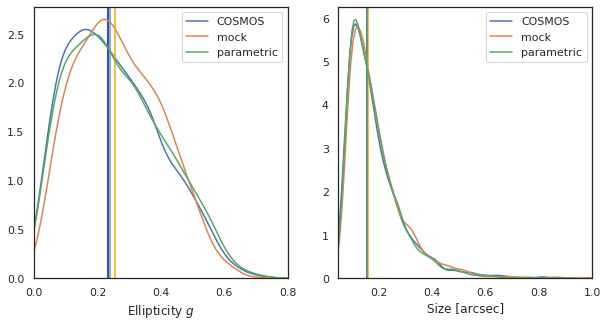

In [52]:
figure(figsize=(10,5))
subplot(121)

sns.distplot(m_real[mask]['g'], label='COSMOS', hist=False);
axvline(median(array(m_real[mask]['g'])), color='blue')
sns.distplot(m_mock[mask]['g'], label='mock', hist=False);
axvline(median(array(m_mock[mask]['g'])), color='orange')
sns.distplot(m_param[mask]['g'], label='parametric', hist=False);
axvline(median(array(m_param[mask]['g'])), color='g')
xlim(0,0.8)
legend()
xlabel('Ellipticity $g$')

subplot(122)
res=0.03 # pixel scale in arcsec
sns.distplot(m_real[mask]['sigma_e']*res, label='COSMOS', hist=False);
axvline(median(array(m_real[mask]['sigma_e']*res)), color='blue')
sns.distplot(m_mock[mask]['sigma_e']*res, label='mock', hist=False);
axvline(median(array(m_mock[mask]['sigma_e']*res)), color='orange')
sns.distplot(m_param[mask]['sigma_e']*res, label='parametric', hist=False);
axvline(median(array(m_param[mask]['sigma_e']*res)), color='g')
#title('Size distribution')
xlabel('Size [arcsec]')
xlim(0.05,1.)
savefig("Figures/Figure_moments.pdf")